In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [79]:
df = pd.read_csv(
    "../data/daily-total-female-births-CA.csv", 
    parse_dates=[0]
)

In [72]:
df.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [56]:
df.dtypes

births    int64
dtype: object

In [57]:
resample = df.resample("ME").sum()

In [58]:
resample

,births
date,
1959-01-31,1213
1959-02-28,1148
1959-03-31,1218
1959-04-30,1195
1959-05-31,1208
1959-06-30,1212
1959-07-31,1300
1959-08-31,1351
1959-09-30,1446


<Axes: xlabel='date', ylabel='births'>

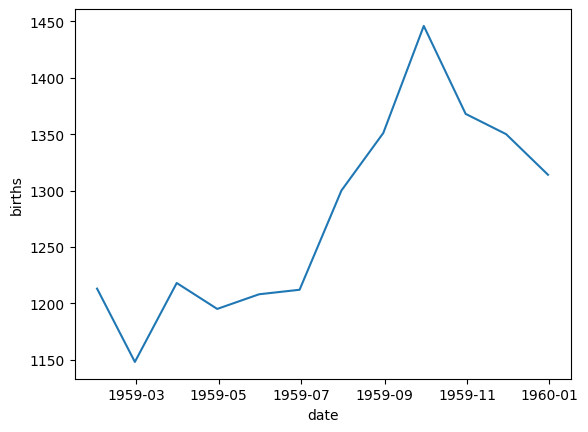

In [59]:
sns.lineplot(data=resample, x=resample.index, y=resample["births"])

In [63]:
df["lag"] = df["births"].shift(1)

<Axes: xlabel='lag', ylabel='births'>

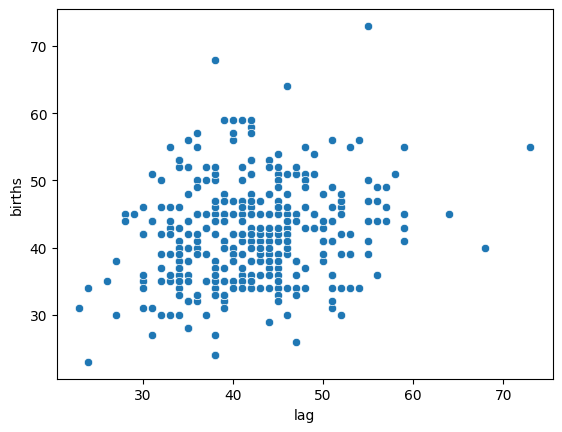

In [64]:
sns.scatterplot(data=df, x="lag", y="births")

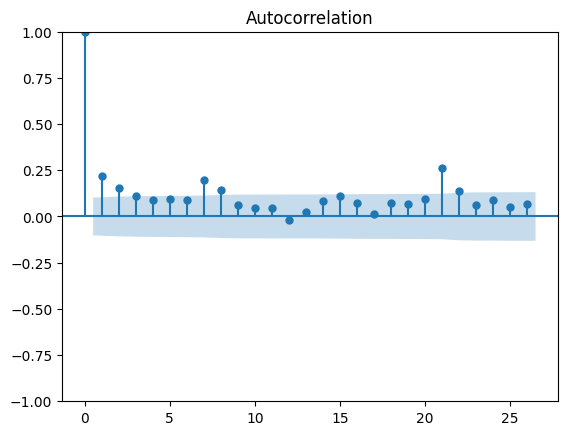

In [69]:
time_series = df["births"]
fig = plot_acf(time_series)
plt.show()

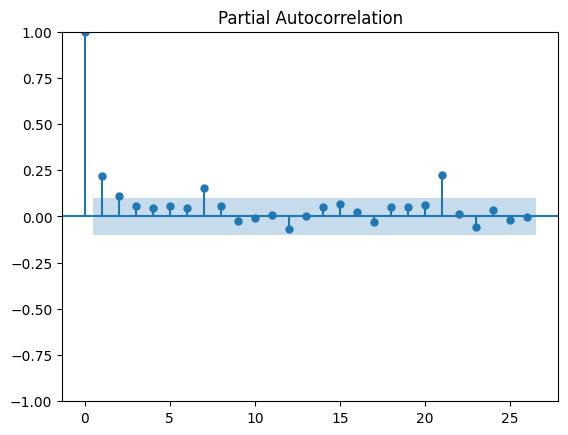

In [70]:
fig = plot_pacf(time_series)
plt.show()

# feature engineering

In [94]:
df = df.assign(
    month=df["date"].dt.month,
    day=df["date"].dt.day,
    year=df["date"].dt.year,
    lag1=df["births"].shift(1),
    lag2=df["births"].shift(2),
    last_year=df["births"].shift(365),
    roll_mean=df["births"].rolling(window=2).mean(),
    rolling_max=df["births"].rolling(window=3).max(),
    expand_max=df["births"].expanding().max()
)

In [95]:
df.head()

,date,births,month,day,year,lag1,lag2,last_year,roll_mean,rolling_max,expand_max
0,1959-01-01,35,1,1,1959,NaN,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1,2,1959,35.0,NaN,NaN,33.5,NaN,35.0
2,1959-01-03,30,1,3,1959,32.0,35.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1,4,1959,30.0,32.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1,5,1959,31.0,30.0,NaN,37.5,44.0,44.0


In [ ]:
# decompose
# seasonal_decompose(df["births"], model="additive") # series must have date time index

In [99]:
df = pd.read_csv("../data/daily-min-temperatures.csv", parse_dates=[0])

In [100]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [101]:
df["lag1"] = df["Temp"].shift(1)

In [102]:
# naive method is forecasted value is just the previous value so just shift(1)
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]
X_train, y_train = train["lag1"], train["Temp"] 
X_test, y_test = test["lag1"], test["Temp"]